In [33]:
import sys
sys.path.append("..")
%load_ext autoreload
%autoreload 2
from targets import Target
from models import VAE

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


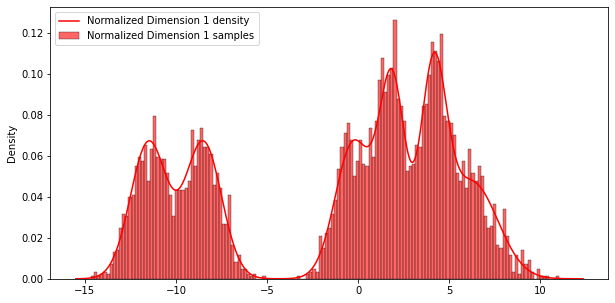

In [41]:
example =  "Normalized Dimension 1"
num_samples = 50000
target =Target(example, num_samples)
target.target_visual()
p, target_log_density, target_samples = target.get_target()

In [43]:
epochs = 100
batch_size = int(num_samples/50)
d =1
hidden_sizes_encoder = [256,256,256]
hidden_sizes_decoder = [256,256,256]
vae = VAE(target_samples,d,hidden_sizes_encoder,hidden_sizes_decoder)
vae.train(epochs, batch_size)
vae.model_visual(num_samples = 5000)

 49%|██████████████████████████████████████████████████████████████████▋                                                                     | 49/100 [03:12<03:20,  3.93s/it, loss = nan]


KeyboardInterrupt: 

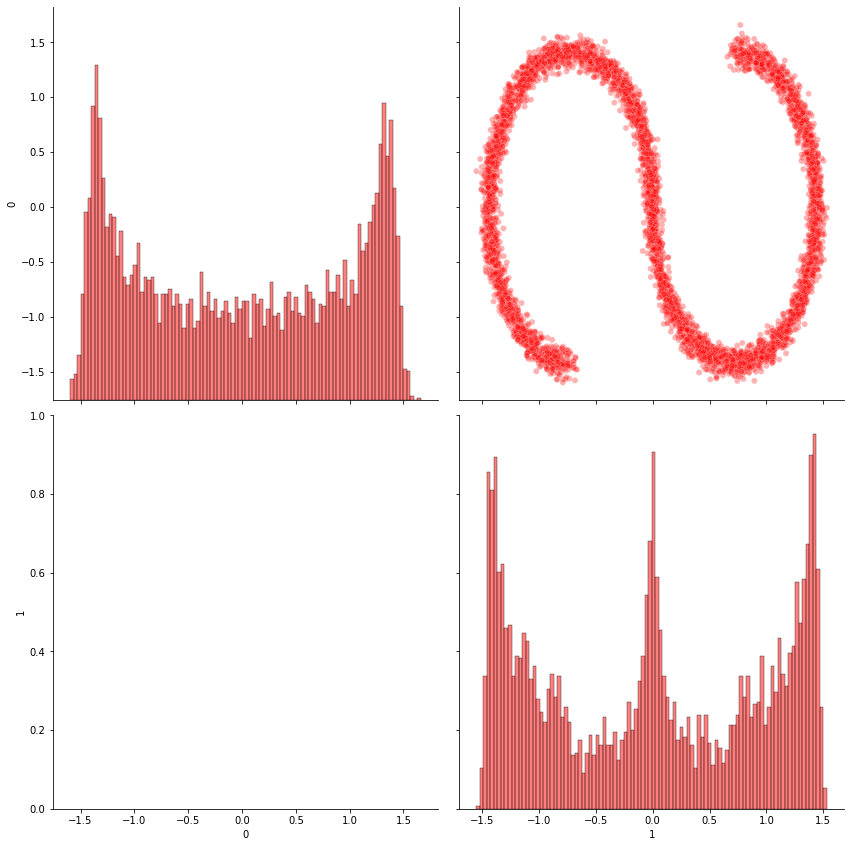

In [12]:
example =  "S Curve"
num_samples = 50000
target =Target(example, num_samples)
target.target_visual()
p, target_log_density, target_samples = target.get_target()

torch.Size([50000, 10])
torch.Size([50000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.

  0%|                                                                                                                                                               | 0/1 [00:00<?, ?it/s]

torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:13<00:00, 13.71s/it, loss = -87.13550567626953]


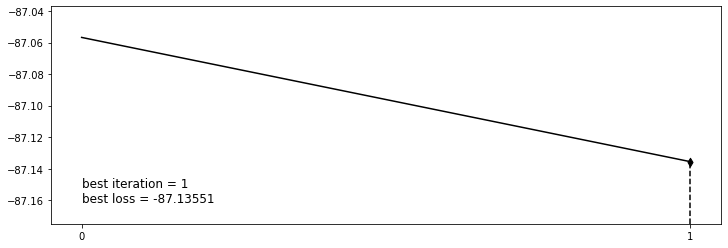

In [23]:
epochs = 1
batch_size = int(num_samples/50)
d =10
hidden_sizes_encoder = [128,128,128]
hidden_sizes_decoder = [128,128,128]
vae = VAE(target_samples,d,hidden_sizes_encoder,hidden_sizes_decoder)
out = vae.encoder(target_samples)
mu, log_sigma = out[...,:vae.d],out[...,vae.d:]
print(log_sigma.shape)
print(vae.DKL_posterior_prior(mu, log_sigma).shape)
vae.train(epochs, batch_size)
#vae.model_visual(num_samples = 5000)

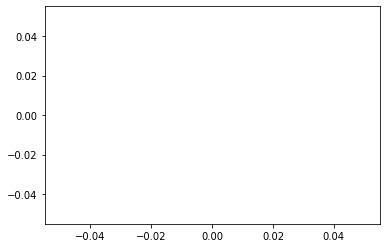

In [14]:
samples = vae.sample_model(5000)
import matplotlib.pyplot as plt
plt.scatter(samples[:,0].detach().numpy(), samples[:,1].detach().numpy())

In [ ]:
import torch
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)
images = mnist_trainset.data.flatten(start_dim=1)
targets = mnist_trainset.targets

digit = 0 
extracted = images[targets == digit] 
target_samples = (extracted + torch.randn(extracted.shape))/16

num_samples  = target_samples.shape[0]
print('number of samples = ' + str(num_samples))
p = target_samples.shape[-1]
plt.imshow(target_samples[50].reshape(28,28))

In [ ]:
epochs = 500
batch_size = int(num_samples/100)
d =50
hidden_sizes_encoder = [256,256,256,256]
hidden_sizes_decoder = [256,256,256,256]
vae = VAE(target_samples,p,d,hidden_sizes_encoder,hidden_sizes_decoder)
vae.train(epochs, batch_size)

In [ ]:
for i in range(20):
    plt.figure()
    plt.imshow(vae.sample_model(1).reshape(28,28).cpu().detach().numpy())